In [1]:
import numpy as np
import scipy
import time
import math
from scipy.stats import norm

import mystic
from mystic.solvers import DifferentialEvolutionSolver, diffev2
from mystic.strategy import Best1Bin
from mystic.monitors import Monitor,VerboseMonitor

from copy import deepcopy

from tomography import *

from NestedForLoop import get_iterator
from pathlib import Path
from scipy.linalg import sqrtm

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import os
import glob

import pandas as pd

from scipy.optimize import least_squares

import fnmatch
from efficiencies import finding_file, get_channels_eff, set_raw_counts
from optimization import Optimizer, function_fidelity, FidelityResults
from constants import *

from densitymatrix import DensityMatrix

from pathlib import Path
import fnmatch

In [2]:
######################################################################################################
#----- COUNTING THE FILES AND SAVING THEM IN AN ARRAY TO MAKES THE REST OF THE ANALYSIS EASIER -------
######################################################################################################

n_files=0
working_dir=r"C:\Users\Simon\Documents\Travail\ChannelCertification\Stability\StabilityNight24052022"
os.chdir(working_dir)

filenames = [i for i in glob.glob("StateTomography*")]

index_to_file = {}

for index, filename in enumerate(filenames):
    index_to_file[n_files] = f"{filename}"
    n_files+=1

In [3]:
os.chdir(working_dir)
qubit_number=2

state = []
xp_counts_corrected_with_eff=[]

#####################################################################
#---------------------- STATE TOMOGRAPHY ----------------------------
#####################################################################

for index in range(len(index_to_file)):
    os.chdir(f"{working_dir}\\{index_to_file[index]}")
    print(f"{working_dir}\\{index_to_file[index]}")
    datafiles=[i for i in glob.glob("*")]
                
    ### Calculating the efficiencies of each detector
    efficiencies=get_channels_eff(datafiles, os.getcwd())

    ### Opening the data files and writing the data in counts_aux array
    counts_aux=set_raw_counts(datafiles, qubit_number, os.getcwd())
    xp_counts=np.array(np.transpose(counts_aux))

    statetomo=LRETomography(int(qubit_number), xp_counts)
    statetomo.run(correct_eff=efficiencies, print_nc=False)
    xp_counts_corrected_with_eff.append(statetomo.xp_counts)
    
    state.append(DensityMatrix(statetomo.quantum_state.get_density_matrix()))
    print('\n Fast maximum likelihood estimation: \n', state[-1], '\n')


C:\Users\Simon\Documents\Travail\ChannelCertification\Stability\StabilityNight24052022\StateTomography20220524232053

 Fast maximum likelihood estimation: 
 array([[ 4.78925844e-03-5.04931188e-19j,  3.77233087e-03+6.39476451e-03j,
         5.55821414e-03+9.58580136e-04j, -2.12242267e-04-1.68196921e-05j],
       [ 3.77233087e-03-6.39476451e-03j,  5.01215032e-01+8.34937222e-17j,
         4.93802070e-01+1.10774665e-02j, -8.16853425e-04-7.13521761e-03j],
       [ 5.55821414e-03-9.58580136e-04j,  4.93802070e-01-1.10774665e-02j,
         4.93873457e-01-8.30430565e-17j, -1.14323112e-03-7.33606783e-03j],
       [-2.12242267e-04+1.68196921e-05j, -8.16853425e-04+7.13521761e-03j,
        -1.14323112e-03+7.33606783e-03j,  1.22252690e-04+5.42654757e-20j]]) 

C:\Users\Simon\Documents\Travail\ChannelCertification\Stability\StabilityNight24052022\StateTomography20220524233658

 Fast maximum likelihood estimation: 
 array([[ 4.88462837e-03+1.82977100e-18j,  4.11661529e-03+5.85854020e-03j,
         5.74

        -1.76928236e-03+7.98511211e-03j,  1.95048265e-04-2.30294662e-19j]]) 

C:\Users\Simon\Documents\Travail\ChannelCertification\Stability\StabilityNight24052022\StateTomography20220525021753

 Fast maximum likelihood estimation: 
 array([[ 4.60407589e-03+6.07093366e-20j,  4.63742740e-03+6.41680712e-03j,
         6.11512249e-03+9.85819579e-04j, -2.41063809e-04+5.84426052e-04j],
       [ 4.63742740e-03-6.41680712e-03j,  5.00708032e-01-9.69632781e-17j,
         4.93936081e-01+6.61339883e-03j, -9.84526395e-04-7.32302529e-03j],
       [ 6.11512249e-03-9.85819579e-04j,  4.93936081e-01-6.61339883e-03j,
         4.94456460e-01+9.78433002e-17j, -1.98855888e-03-7.36292323e-03j],
       [-2.41063809e-04-5.84426052e-04j, -9.84526395e-04+7.32302529e-03j,
        -1.98855888e-03+7.36292323e-03j,  2.31431647e-04-9.40731383e-19j]]) 

C:\Users\Simon\Documents\Travail\ChannelCertification\Stability\StabilityNight24052022\StateTomography20220525023358

 Fast maximum likelihood estimation: 
 array([[ 

        -2.64737852e-03+7.24249700e-03j,  1.73397672e-04-4.16600409e-19j]]) 

C:\Users\Simon\Documents\Travail\ChannelCertification\Stability\StabilityNight24052022\StateTomography20220525051452

 Fast maximum likelihood estimation: 
 array([[ 4.55542152e-03-1.24121843e-18j,  5.41099550e-03+5.98968503e-03j,
         6.67497375e-03+8.03659027e-04j, -2.83590316e-04+6.12818594e-05j],
       [ 5.41099550e-03-5.98968503e-03j,  5.00295334e-01+1.46516784e-17j,
         4.94265274e-01+8.10249635e-03j, -2.21900784e-03-6.87079571e-03j],
       [ 6.67497375e-03-8.03659027e-04j,  4.94265274e-01-8.10249635e-03j,
         4.95012692e-01-1.32586050e-17j, -2.60431983e-03-7.10159903e-03j],
       [-2.83590316e-04-6.12818594e-05j, -2.21900784e-03+6.87079571e-03j,
        -2.60431983e-03+7.10159903e-03j,  1.36552627e-04-1.51854974e-19j]]) 

C:\Users\Simon\Documents\Travail\ChannelCertification\Stability\StabilityNight24052022\StateTomography20220525053057

 Fast maximum likelihood estimation: 
 array([[ 

In [4]:
######################################
#-- DEFINING THE TARGET BELL STATE ---
######################################

#bell=(np.array([1,0,0,0])+np.array([0,0,0,1]))/np.sqrt(2)
#bell=(np.array([1,0,0,0])-np.array([0,0,0,1]))/np.sqrt(2)
bell=(np.array([0,1,0,0])+np.array([0,0,1,0]))/np.sqrt(2)
#bell=(np.array([0,1,0,0])-np.array([0,0,1,0]))/np.sqrt(2)
bellmatrix=np.array(np.outer(bell, np.conjugate(bell)))

#for index in range(len(state)):
#    print(np.real(np.round(state[index].fidelity_to_pure(bell),5)))

In [5]:
##########################################################
#----- OPTIMIZATION OF MAX FIDELITY UP TO UNITARIES ------
##########################################################
fid=np.zeros((n_files))
opt_state = state[0]

guess=np.array([0, 0, 0, 0, 0, 0])
bounds=[(-np.pi,np.pi)]*6

opt=Optimizer(guess, function_fidelity, results=FidelityResults)
result=opt.optimize(opt_state, bell, bounds=bounds)
U = np.kron(result.u1,result.u2)
bell_target = np.transpose(np.conjugate(U))@bellmatrix@U

Generation 0 has ChiSquare: -0.991426
Generation 50 has ChiSquare: -0.991623
Generation 100 has ChiSquare: -0.991623
STOP("ChangeOverGeneration with {'tolerance': 1e-08, 'generations': 100}")
Optimization terminated successfully.
         Current function value: -0.991623
         Iterations: 147
         Function evaluations: 14800


In [6]:
##########################################################
#---------------- CALCULATING THE ERRORS -----------------
##########################################################
error_runs=1000

mu=np.zeros((n_files))
std=np.zeros((n_files))

states=state
for index in range(len(states)):

    dm = states[index]
    dm.calculate_errors(xp_counts_corrected_with_eff[index].counts_array, error_runs, bell)
    
    print('index, fidelity, fidelity_mean, fidelity_std: ',
          index, np.round(states[index].fidelity(bell_target),5), np.round(dm.mu,5), np.round(dm.std,5))

index, fidelity, fidelity_mean, fidelity_std:  0 (0.99162+0j) 0.99073 0.00041
index, fidelity, fidelity_mean, fidelity_std:  1 (0.99131+0j) 0.99044 0.00043
index, fidelity, fidelity_mean, fidelity_std:  2 (0.99159-0j) 0.9907 0.00046
index, fidelity, fidelity_mean, fidelity_std:  3 (0.99169-0j) 0.9909 0.00043
index, fidelity, fidelity_mean, fidelity_std:  4 (0.99176+0j) 0.99102 0.0004
index, fidelity, fidelity_mean, fidelity_std:  5 (0.9918+0j) 0.99108 0.00045
index, fidelity, fidelity_mean, fidelity_std:  6 (0.99187-0j) 0.99109 0.00044
index, fidelity, fidelity_mean, fidelity_std:  7 (0.99191-0j) 0.9912 0.00041
index, fidelity, fidelity_mean, fidelity_std:  8 (0.99191-0j) 0.99115 0.00042
index, fidelity, fidelity_mean, fidelity_std:  9 (0.99213+0j) 0.99136 0.00042
index, fidelity, fidelity_mean, fidelity_std:  10 (0.99195+0j) 0.99116 0.00044
index, fidelity, fidelity_mean, fidelity_std:  11 (0.99171-0j) 0.9909 0.00043
index, fidelity, fidelity_mean, fidelity_std:  12 (0.99204-0j) 0.991

[  0.          16.08333333  32.18333333  48.26666667  64.36666667
  80.45        96.53333333 112.63333333 128.71666667 144.81666667
 160.9        177.         193.08333333 209.16666667 225.26666667
 241.35       257.45       273.53333333 289.63333333 305.71666667
 321.8        337.9        353.98333333 370.06666667 386.16666667
 466.68333333 482.76666667]
[0.99073 0.99044 0.9907  0.9909  0.99102 0.99108 0.99109 0.9912  0.99115
 0.99136 0.99116 0.9909  0.99118 0.99109 0.9911  0.99124 0.99093 0.99131
 0.99129 0.99116 0.99121 0.9912  0.99128 0.99147 0.99167 0.99156 0.99164]
[0.00041 0.00043 0.00046 0.00043 0.0004  0.00045 0.00044 0.00041 0.00042
 0.00042 0.00044 0.00043 0.00044 0.0004  0.00043 0.00044 0.00043 0.00043
 0.00042 0.00044 0.00041 0.00044 0.00046 0.00044 0.00041 0.00047 0.00042]


Text(0.5, 1.0, 'Stability of the entanglement source')

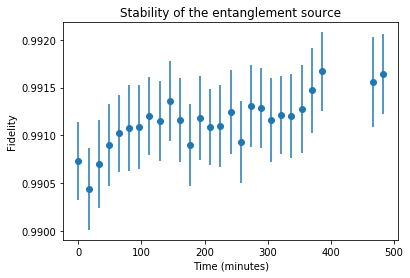

In [7]:
time=[]
ydata=np.zeros(len(states))
yerror=np.zeros(len(states))

### Converting the time label into minutes
for j in range(len(index_to_file)):
    time.append(int(index_to_file[j][-2:])/60+int(index_to_file[j][-4:-2])+60*int(index_to_file[j][-6:-4])+24*60*int(index_to_file[j][-8:-6]))
first=np.min(time)


time=time-np.array([first]*len(index_to_file))
xdata=time
for index in range(len(states)):
    ydata[index]=np.real(np.round(states[index].mu,5))
    yerror[index]=np.round(states[index].std,5)
print(time)
print(ydata)
print(yerror)
plt.errorbar(xdata, ydata, yerror, fmt='o', label='data')
plt.ylabel('Fidelity')
plt.xlabel('Time (minutes)')
plt.title('Stability of the entanglement source')